## Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import sys
import time
import random

## Loading dataset

In [2]:
samples = pd.read_csv("./dataset/dice_com-job_us_sample.csv")
survey = pd.read_csv("./dataset/survey_results_public.csv")

C:\Users\18573\AppData\Local\Temp\ipykernel_21668\2000241751.py:2: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  survey = pd.read_csv("./dataset/survey_results_public.csv")


## Function to Plot Jobs

In [3]:
def plot_jobs(sim,user_id,sim_user_id):
    ls = list()
    for i in range(0,len(sim)):
        ls.append([sim[i][1],sim[i][2]])

    plot = pd.DataFrame(data=ls,columns=['X1','X2'])
    
    # Plotting the scatterplot
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    scatter = ax.scatter(plot['X1'],plot['X2'],c='r',label='datapoints')
    us = 'Select user - '+str(user_id)
    rec_us = 'Select user - '+str(sim_user_id)
    ax.scatter(sim[user_id][1],sim[user_id][2],c='b',label=us,s=100)
    ax.scatter(sim[sim_user_id][1],sim[sim_user_id][2],c='y',label=rec_us,s=100)
    ax.set_xlabel('Normalized skills of Users X')
    ax.set_ylabel('Normalized skills of Users Y')
    ax.legend()
    ax.set_title('Similarity Plot')
    plt.show()

def find_closest_user(sim,input_user):
    suser=sim[input_user].index(second_largest_value(sim[input_user]))
    return suser

def second_largest_value(sim):
     
    # make empty list
    list1 = sim.copy()

    # take input number of elements in list
    num = int(len(sim))

    # print second maximum element using sorted() method
    return sorted(list1)[-2]

## Get unique companies

In [4]:
companies = samples['company'].unique()

## Assign random companies to each respondent

In [5]:
#Assign random companies to each respondent
cbf = pd.DataFrame(survey['Respondent'])
for i in range(survey.shape[0]):
    r=random.randint(1,4291)
    cbf.loc[i,"company"]=companies[r]
print(cbf.head())

   Respondent                                     company
0           1                Technology Consultants, Inc.
1           3                                Manpower Inc
2           4  American Association of Nurse Anesthetists
3           5                            Avery Associates
4           7                Sierra Business Solution LLC


## Export to csv

In [6]:
cbf.to_csv("./dataset/collaborating_data.csv")

## Merge all the dataset

In [7]:
#merge all the dataset having skills from user profile.
dflang=pd.read_csv("./dataset/LanguageWorkedwith.csv")
dfdata=pd.read_csv("./dataset/DatabaseWorkedWith.csv")
dfplat=pd.read_csv("./dataset/PlatformWorkedWith.csv")
dfframe=pd.read_csv("./dataset/FrameworkWorkedWith.csv")
dfdev=pd.read_csv("./dataset/DevType.csv")
dfmerge=pd.merge(dflang,dfdata,on="Respondent")
dfmerge=pd.merge(dfmerge,dfplat,on="Respondent")
dfmerge=pd.merge(dfmerge,dfframe,on="Respondent")
dfmerge=pd.merge(dfmerge,dfdev,on="Respondent")
dfmerge.to_csv("./dataset/userskills.csv")

C:\Users\18573\AppData\Local\Temp\ipykernel_21668\1307668044.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 1_x'} in the result is deprecated and will raise a MergeError in a future version.
  dfmerge=pd.merge(dfmerge,dfframe,on="Respondent")


## Build dictionary for skills

In [8]:
dfuser=pd.read_csv("./dataset/userskills.csv")

#remove duplicate columns during merge
dfuser = dfuser.loc[:,~dfuser.columns.duplicated()]
dfuser=dfuser.fillna(0)
dfuser.shape
dfuser.head()

#remove rows with less than 5 skills
dfuser=dfuser.dropna(thresh=5)
dfuser.shape
m=(np.asscalar(np.int32(max(dfuser["Respondent"]))))

#Build  a dictionary of respondent id's as keys and thier skills as values
temp=[0]*m
vector=np.array(temp)
count=1
star=time.time()
d=dict()
for row in dfuser.iterrows():
        index,data=row
        l=list()
        s=np.asscalar(np.int32(data.values[0]))
        d[s]=np.array(list(data.values[1:]))

C:\Users\18573\AppData\Local\Temp\ipykernel_21668\3581746880.py:12: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  m=(np.asscalar(np.int32(max(dfuser["Respondent"]))))
C:\Users\18573\AppData\Local\Temp\ipykernel_21668\3581746880.py:23: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  s=np.asscalar(np.int32(data.values[0]))


## Build the user-user similarity matrix

In [9]:
sim=list()
for i in range(5000):
        l=list()
        l=[0]*5000
        sim.append(l)

In [10]:
count1=1
count2=1
for key, value in d.items():
        if(key<5000):
            #print(key)
            b=(np.linalg.norm(value))
            for key2,value2 in d.items():
                if(key2<5000):
                    #print(key2)
                    a=np.dot(d[key],d[key2])
                    ans=a/(np.linalg.norm(value2)*b)
                    sim[key][key2]=ans
                    #count2+=1
            #count1+=1
e=time.time()
print("total time for building similarity matrix ")

total time for building similarity matrix 


## Plot similarity for selected user

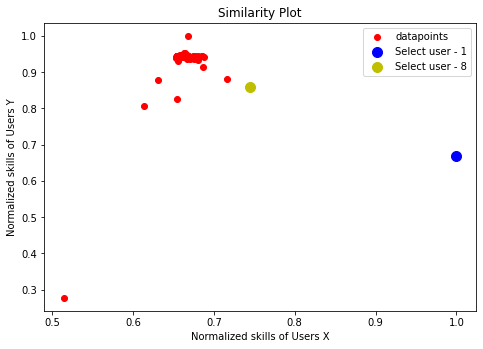

In [11]:
input_user = 1
rec_user = find_closest_user(sim,input_user)
plot_jobs(sim,user_id = input_user,sim_user_id = rec_user)

## Checking with randomized dataset

In [12]:
#Lets check with the random jobs given to the users .
dfjob=pd.read_csv("./dataset/collaborating_data.csv")
#Recommend user 3 a job based on another user who has almost the same skill as him.
print("Respondent 3 is working in ")
print(dfjob.loc[dfjob.Respondent==3]["company"].values)

m1=max(sim[3][:3])
m2=max(sim[3][4:])
ma=max(m1,m2)
suser=sim[3].index(ma)
#print(suser) #user 3265 is very similar to user 3 and hence we can recommend user 3265 job to user 3.
print("Respondent ",suser,"is working in")
print(dfjob.loc[dfjob.Respondent==suser]["company"].values)

Respondent 3 is working in 
['Manpower Inc']
Respondent  7 is working in
['Sierra Business Solution LLC']


## Plot similarity for selected user

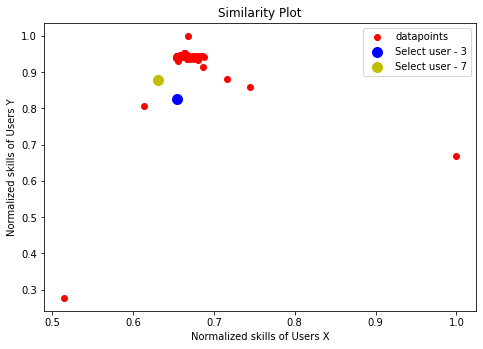

In [13]:
input_user = 3
plot_jobs(sim,input_user,find_closest_user(sim,input_user))

## For building collaborative filtering

In [14]:
dfcont=pd.read_csv("./dataset/recommendations.csv")
sim=list()
s=time.time()
for i in range(2000):
        l=list()
        l=[0]*2000
        sim.append(l)
e=time.time()
print(e-s)
t=time.time()
print("Building the similarity matrix....\n")
for key, value in d.items():
        if(key<20):
            #print(key)
            b=(np.linalg.norm(value))
            for key2,value2 in d.items():
                if(key2<20):
                    #print(key2)
                    a=np.dot(d[key],d[key2])
                    ans=a/(np.linalg.norm(value2)*b)
                    sim[key][key2]=ans
                    #count2+=1
            #count1+=1
e=time.time()

0.3974137306213379
Building the similarity matrix....



In [15]:
#Recommend user 3 a job based on another user who has almost the same skill as him.
print("Respondent 3 was recommended jobs from content based filtering in ")
print(dfcont.loc[dfcont.Respondent==3]["company"].values)
print("Respondent 3 was recommended job titles from content based filtering ")
print(dfcont.loc[dfcont.Respondent==3]["jobtitle"].values)
print("\n")
m1=max(sim[3][:3])
m2=max(sim[3][4:])
ma=max(m1,m2)
suser=sim[3].index(ma)
print("Respondent ",suser,"was most similiar to respondent 3\n")
print("Based on respondent ",suser," the jobs recommended to 3 are ")
print(dfcont.loc[dfcont.Respondent==suser]["company"].values)
print("The recommended job titles are ")
print(dfcont.loc[dfcont.Respondent==suser]["jobtitle"].values)

Respondent 3 was recommended jobs from content based filtering in 
['ICONMA' 'Cypress Group' 'SolTech, Inc' 'Saicon Consultants Inc.'
 'Samsung SDS America Inc' 'Strivector' 'Aria Systems' 'Aria Systems'
 'Strivector' 'Universal Software Corporation']
Respondent 3 was recommended job titles from content based filtering 
['Python Developer' 'Full-Stack Python Developer'
 'Full Stack Javascript Engineer' 'Full Stack Developer'
 'System Administrator' 'System Administrator' 'Application Administrator'
 'Application Administrator' 'System Administrator' 'Full Stack Engineer']


Respondent  7 was most similiar to respondent 3

Based on respondent  7  the jobs recommended to 3 are 
['Levanture' 'Avesta Computer Services' 'Confidential Company'
 'MatchPoint Consulting Group' 'Genesis TechSystems' 'Collabera'
 'Cox Communications' 'Celestos, LLC' 'Capgemini' 'iconectiv']
The recommended job titles are 
['NMS Solution Architect' 'Sr. Systems Test Engineer (PERM)'
 'Oracle iStore Technical Resou

## Plot similarity for selected user

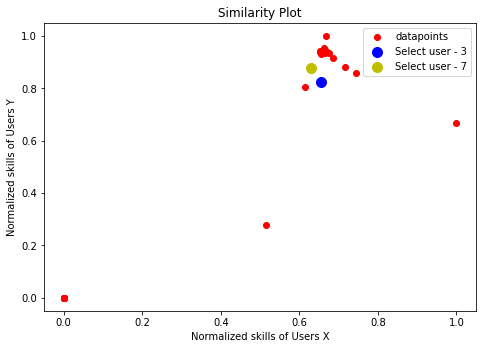

In [16]:
input_user = 3
plot_jobs(sim,input_user,find_closest_user(sim,input_user))